<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
    
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 

<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.




<p></p><p></p><p></p>





**Le problème posé :**

# <font color='blus'>Indexation d'images</font>

Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Du coup, vous vous demandez ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc réaliser un index de l’ensemble de la base de données d’images qu’ils possèdent, pour classer les chiens par races.

**<font color='blus'>Les données</font>**

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous développerez un algorithme en utilisant le Stanford Dogs Dataset pour entraîner votre algorithme.

**<font color='blus'>Votre mission</font>**

En tant que Data Scientist, l'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

**<font color='blus'>Contraintes</font>**

Lors de ce projet, vous mettrez en œuvre deux approches.

* Une approche classique : il s’agit de pre-processer des images avec des techniques spécifiques (e.g.whitening, equalisation, filtre linéaire/laplacien/gaussien, éventuellement modifier la taille des images), puis d’extraire des features (e.g. texture, corners, edges et SIFT detector). Il faut ensuite réduire les dimensions, soit par des approches classiques (e.g. PCA, k-means) soit avec une approche par histogrammes et dictionary learning (bag-of-words appliqué aux images), puis appliquer des algorithmes de classification standards.



* Lors de l’analyse exploratoire, vous regarderez si les features extraites et utilisées en classification sont prometteuses en utilisant des méthodes de réduction de dimension pour visualiser le dataset en 2D. Cela vous permettra d’affiner votre intuition sur les différents traitements possibles, sans que cela ne se substitue à des mesures de performances rigoureuses.



* Une approche s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels). Compte tenu de la taille et de la complexité du dataset, et de la puissance de calcul à votre disposition, il est très difficile d’obtenir de bonnes performances (pour ça, essayez MNIST). Aussi, est-il recommandé d’utiliser le transfer learning, c’est-à-dire utiliser un réseau déjà entraîné, et le modifier pour répondre à votre problème. Une première chose obligatoire est de ré-entraîner les dernières couches pour prédire les classes qui vous intéressent seulement. Il est également possible d’adapter la structure (supprimer certaines couches par exemple) ou de ré-entraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

In [64]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### New version of  `oP7_DataBreed` instance is updated and dumped

When class `P7_DataBreed` is upaded, this lead to update methods and attributes.
While attributes does not exists in old version of `P7_DataBreed`, this process allows 
to create an instance of latest version of `P7_DataBreed` class, update new attributes values and dump it.

* Fist step : save 
    * Copy of `oP7_DataBreed` holds new methods.
    * New attributes that does not exists into old version of `oP7_DataBreed` are masked into copy process
* Second step : new attributes update
    * Original instance of `oP7_DataBreed` is created; this instance hold new methods and new attributes.
    * Saved instance of new version from `P7_DataBreed` is copied back into original instance.
* Third step : backup of new instance 
    * New instance of `oP7_DataBreed` with new methods and updated attributes is dumped into a file.

In [145]:
import pandas as pd
import numpy as np

# New attribute is created with an updated value
new_attribute = pd.DataFrame()
new_attribute = np.array(0).copy()
new_attribute = dict()
new_attribute = True
new_attribute = np.array(128).copy()
new_attribute = pd.Series()
new_attribute = list()
new_attribute = dict()


**Save oP7_DataBreed.dump file into oP7_DataBreed_save.dump**

In [2]:
import shutil
if False :
    filename = './data/oP7_DataBreed.dump'
    #-------------------------------------------------------------------------------------------------------
    # Save already dumped file
    #-------------------------------------------------------------------------------------------------------
    shutil.copyfile(filename, './data/oP7_DataBreed_save.dump')


In [146]:
import p5_util
import P7_DataBreed
filename = './data/oP7_DataBreed.dump'
    
if new_attribute is not None :

    #-------------------------------------------------------------------------------------------------------
    # Create a copy of P7_DataBreed and save the copy.
    # Copy of P7_DataBreed holds new methods.
    # New attributes that does not exists into old version of oP7_DataBreed are masked into copy process
    #-------------------------------------------------------------------------------------------------------
    oP7_DataBreed_save = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed_save.copy(oP7_DataBreed, is_new_attribute=False)
    p5_util.object_dump(oP7_DataBreed_save,filename)
    oP7_DataBreed_save.show(legend='Old version')

    #-------------------------------------------------------------------------------------------------------
    # An original instance oP7_DataBreed is created; this instance hold new methods and new attributes.
    # Copy of P7_DataBreed is copied back into original instance.
    # New attributes that does not exists into old version of oP7_DataBreed are masked into copy process
    #-------------------------------------------------------------------------------------------------------
    oP7_DataBreed = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed.copy(oP7_DataBreed_save)

    #-------------------------------------------------------------------------------------------------------
    # New attributes values are updated if required
    #-------------------------------------------------------------------------------------------------------
    oP7_DataBreed.list_restricted_image = new_attribute

    #-------------------------------------------------------------------------------------------------------
    # New instance of oP7_DataBreed with new attributes and new methods is saved
    #-------------------------------------------------------------------------------------------------------
    filename = './data/oP7_DataBreed.dump'
    p5_util.object_dump(oP7_DataBreed,filename)
    #print('')
    oP7_DataBreed.show(legend='New version')

    del(oP7_DataBreed_save)


*** WARN : new attributes from object are not copied on target!


 Old version
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 7200
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 20
X train size .................. : (649, 19)
y train size .................. : (649, 7)
X test size ................... : (73, 19)
y test size ................... : (73, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 6
Image splitted ................ : True
Key point descriptors ......... : (163839, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Number of splitted images .... : 0


 New version
Path

#### After update of code into `P7_DataBreed` for unmasking copy of new attributes, execute following cell

In [147]:
import p5_util
import P7_DataBreed
if new_attribute is not None :
    filename = './data/oP7_DataBreed.dump'
    oP7_DataBreed_save = p5_util.object_load(filename)
    oP7_DataBreed = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed.copy(oP7_DataBreed_save)
    p5_util.object_dump(oP7_DataBreed,filename)
    del(oP7_DataBreed_save)
    oP7_DataBreed.show()
    new_attribute = None

p5_util.object_load : fileName= ./data/oP7_DataBreed.dump

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 7200
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 20
X train size .................. : (649, 19)
y train size .................. : (649, 7)
X test size ................... : (73, 19)
y test size ................... : (73, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 6
Image splitted ................ : True
Key point descriptors ......... : (163839, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Number of splitted images .... : 0



**Execute following cell in order to update object version with no change in attributes**

* A backup instance of object is created. This backup instance is empty.
* If object instance is not defined then it is read from dmped file.
* object instance is copied back into backup instance
* Backup instance is deleted

In [203]:
new_attribute=None

import p5_util
import P7_DataBreed
if new_attribute is None :
    is_saved = True
    filename='./data/oP7_DataBreed.dump'
    oP7_DataBreed_save = P7_DataBreed.P7_DataBreed()
    try: 
        oP7_DataBreed
    except NameError:
        print('*** INFO : oP7_DataBreed is not defined; loading...')
        oP7_DataBreed = p5_util.object_load(filename)
        is_saved = False
    oP7_DataBreed_save.copy(oP7_DataBreed)
    oP7_DataBreed = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed.copy(oP7_DataBreed_save)
    del(oP7_DataBreed_save)
    oP7_DataBreed.show()
    is_saved=True
    if is_saved is True:
        print('*** INFO : oP7_DataBreed is saved')
        p5_util.object_dump(oP7_DataBreed,filename)



 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 7200
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 20
X train size .................. : (649, 19)
y train size .................. : (649, 7)
X test size ................... : (73, 19)
y test size ................... : (73, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 6
Image splitted ................ : True
Key point descriptors ......... : (163839, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Number of splitted images .... : 0

*** INFO : oP7_DataBreed is saved


# <font color='blus'>0. PCA analysis</font>

In [5]:
oP7_DataBreed.df_desc.shape

(111260, 128)

** Component = 100


array([[-5.56873961e-01, -2.29884290e-01,  1.68689414e-01, ...,
        -6.87971494e-01, -6.10559744e-01, -6.56099969e-01],
       [-7.83747480e-01, -7.56859226e-01, -7.17685926e-01, ...,
         9.81213688e-01,  4.17438008e+00, -2.88747817e-02],
       [-7.18926475e-01, -4.60435825e-01,  1.05506475e+00, ...,
        -6.87971494e-01, -6.10559744e-01, -6.56099969e-01],
       ...,
       [ 3.50620116e-01, -7.56859226e-01, -7.17685926e-01, ...,
        -2.22152374e-01,  7.81422749e-01, -5.38495247e-01],
       [-7.83747480e-01, -7.56859226e-01, -6.49503207e-01, ...,
        -6.87971494e-01, -6.10559744e-01, -6.56099969e-01],
       [ 1.16088269e+00, -3.94563958e-01, -7.17685926e-01, ...,
        -4.55061934e-01, -1.56740344e-03, -4.60092098e-01]])

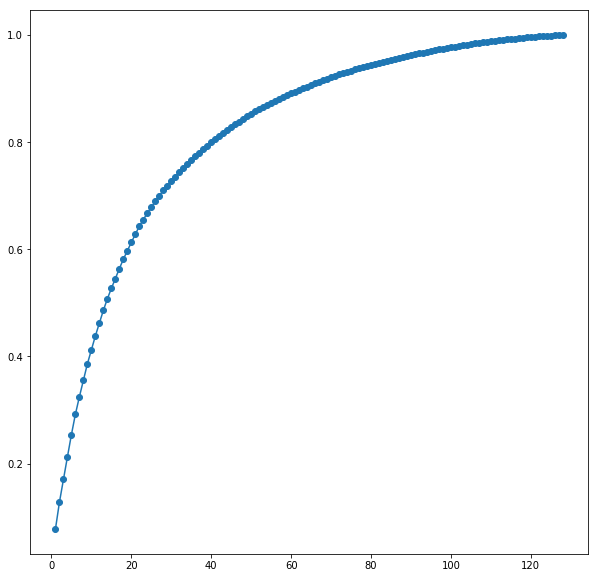

In [2]:
import p3_util_plot
p3_util_plot.pca_all_plot(oP7_DataBreed.df_desc)

# <font color='blus'>1. Analysis with sampled dataset</font>

## <font color='blus'>1.0. Filters exploration</font>

In [2]:
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 7200
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 20
X train size .................. : (649, 19)
y train size .................. : (649, 7)
X test size ................... : (73, 19)
y test size ................... : (73, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (163839, 128)
Classifier name ............... : 
Supported classifiers ......... : []



In [35]:
oP7_DataBreed.build_ser_number_breedname()
oP7_DataBreed.show()
#oP7_DataBreed.dict_breedname_id



INFO : Series already built!
Building...

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 7200
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 20
X train size .................. : (649, 19)
y train size .................. : (649, 7)
X test size ................... : (73, 19)
y test size ................... : (73, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 6
Image splitted ................ : True
Key point descriptors ......... : (163839, 128)
Classifier name ............... : 
Supported classifiers ......... : []



In [51]:
len(oP7_DataBreed._dict_breed_sample.keys())
oP7_DataBreed.show_breedname()

standard_poodle ..... : n02113799-standard_poodle
Saint_Bernard ..... : n02109525-Saint_Bernard
African_hunting_dog ..... : n02116738-African_hunting_dog
boxer ..... : n02108089-boxer
Doberman ..... : n02107142-Doberman
Cardigan ..... : n02113186-Cardigan


In [55]:
breedname = 'Doberman'

oP7_DataBreed.show_image_name(breedname)


Directory breed name = ./data/EasyImages/n02107142-Doberman

Number of images =30
Image name= n02107142_15003.jpg
Image name= n02107142_13356.jpg
Image name= n02107142_1193.jpg
Image name= n02107142_17899.jpg
Image name= n02107142_208.jpg
Image name= n02107142_9621.jpg
Image name= n02107142_7205.jpg
Image name= n02107142_6439.jpg
Image name= n02107142_385.jpg
Image name= n02107142_5783.jpg
Image name= n02107142_17564.jpg
Image name= n02107142_12191.jpg
Image name= n02107142_3094.jpg
Image name= n02107142_7237.jpg
Image name= n02107142_5517.jpg
Image name= n02107142_7206.jpg
Image name= n02107142_17788.jpg
Image name= n02107142_11717.jpg
Image name= n02107142_10009.jpg
Image name= n02107142_14425.jpg
Image name= n02107142_17111.jpg
Image name= n02107142_18779.jpg
Image name= n02107142_15436.jpg
Image name= n02107142_12182.jpg
Image name= n02107142_13677.jpg
Image name= n02107142_30.jpg
Image name= n02107142_3171.jpg
Image name= n02107142_9362.jpg
Image name= n02107142_9772.jpg
Image nam

In [56]:
import p7_util
import image_slicer

image_name = 'n02107142_16400.jpg'
pathfilename = oP7_DataBreed.get_image_filename(breedname,image_name)
pathfilename

'./data/EasyImages/n02107142-Doberman/n02107142_16400.jpg'

In [75]:
image_pil = p7_util.p7_pil_image_load(pathfilename\
                    ,is_verbose=False, std_size=None)

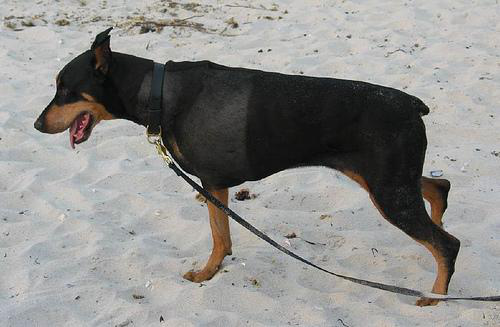

In [81]:
import p7_util
import P7_DataBreed

#image_pil_transformed = ImageOps.autocontrast(ImageOps.grayscale(image_pil).resize((200,200)))
image_pil_transformed = P7_DataBreed.pil_square(image_pil,square=(500,500))
image_pil_transformed = image_pil
image_pil_transformed


In [83]:
dict_image_pil_splited = oP7_DataBreed.split_pil_image(image_pil_transformed,breedname)

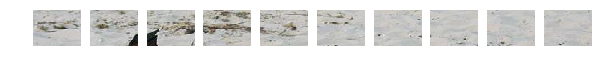

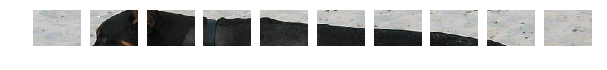

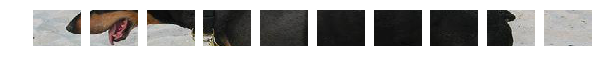

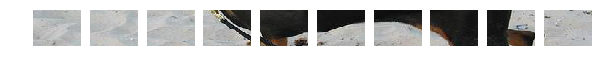

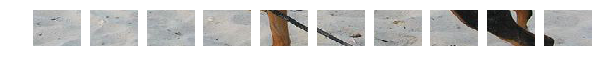

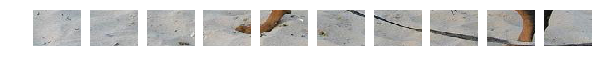

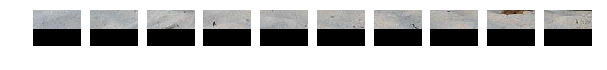

In [85]:
import p7_util
p7_util.p7_image_pil_show(dict_image_pil_splited,std_image_size=(500,375), is_title=False)

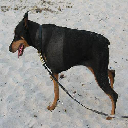

In [310]:
from PIL import ImageOps
image_pil = image_pil.resize(oP7_DataBreed.std_size)
image_pil_128=image_pil.resize((128,128))
ImageOps.autocontrast(image_pil_128)
ImageOps.crop(image_pil_128)

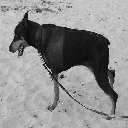

In [311]:
ImageOps.grayscale(image_pil_128)

## <font color='blus'>1.1. Loading the whole dataset</font>

In [5]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/EasyImages')
oP7_DataBreed.load()
oP7_DataBreed.std_size_build()
oP7_DataBreed.show()



 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Image descriptors count .. : 0
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []



## <font color='blus'>1.2. Sampling the dataset</font>

In [6]:
breed_count=10
image_per_breed_count=2
oP7_DataBreed.sampling(breed_count, image_per_breed_count)

## <font color='blus'>1.3. Building descriptors</font>

In [7]:
import P7_DataBreed

oP7_DataBreed.std_size=(200,200)
oP7_DataBreed.build_sift_desc(is_splitted=True)
oP7_DataBreed.show()

kpdesc_build() : Image count=117
Images processed= 117
kpdesc_build() : Image count=187
Images processed= 187
kpdesc_build() : Image count=257
Images processed= 257
kpdesc_build() : Image count=327
Images processed= 327
kpdesc_build() : Image count=397
Images processed= 397
kpdesc_build() : Image count=467
Images processed= 467
kpdesc_build() : Image count=547
Images processed= 547
kpdesc_build() : Image count=617
Images processed= 617
kpdesc_build() : Image count=697
Images processed= 697
kpdesc_build() : Image count=777
Images processed= 777
kpdesc_build() : Image count=907
Images processed= 907
kpdesc_build() : Image count=977
Images processed= 977
kpdesc_build() : Image count=1047
Images processed= 1047
kpdesc_build() : Image count=1117
Images processed= 1117
Error = 0 Total images processed= 1117

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image d

### Analysis of 2 images from a breed

In [ ]:
import p7_util
import P7_DataBreed

dirbreed = './data/Images/n02094433-Yorkshire_terrier'
list_image_name = ['n02094433_3947.jpg','n02094433_8535.jpg']

dict_pil_image = P7_DataBreed.process_breed_sample(dirbreed, list_image_name, oP7_DataBreed.std_size)
dict_pil_image_display = dict()
dict_pil_image_display['Equalized'] = dict_pil_image['equalize'][1]
p7_util.p7_image_pil_show(dict_pil_image_display,std_image_size=None)

`dict_pil_image_equalize` and `dict_breed_kpdesc` are built from `P7_DataBreed.get_image_kpdesc`

#### Descriptors for 2 images contained in a list are built

In [213]:
import P7_DataBreed

list_image_pil = list()
dict_pil_image_equalize = dict()
list_kpdesc = list()
for list_pil_image in dict_pil_image['equalize']:
    for pil_image_equalize in list_pil_image :
        list_image_pil.append(pil_image_equalize)
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image_equalize)
        list_kpdesc.append((kp, desc))
dict_pil_image_equalize={'Yorkshire_terrier':list_image_pil}
dict_breed_kpdesc={'Yorkshire_terrier':list_kpdesc}

In [229]:
type(dict_breed_kpdesc['Yorkshire_terrier'][0][1])
dict_breed_kpdesc['Yorkshire_terrier'][0][1].shape,dict_breed_kpdesc['Yorkshire_terrier'][1][1].shape

((405, 128), (1881, 128))

#### Dictionaries for drawing invariant Key points is built

In [214]:
import cv2
dict_breed_kpdesc_image = dict()
for (breed, list_breed_kpdesc), list_image_pil in zip(dict_breed_kpdesc.items(), dict_pil_image_equalize.values()):
    dict_breed_kpdesc_image[breed] = [cv2.drawKeypoints(np.array(image_pil), kp, np.array(image_pil)) \
                             for ((kp, desc),image_pil) in zip(list_breed_kpdesc,list_image_pil)]

#### Key points are drawned along with images

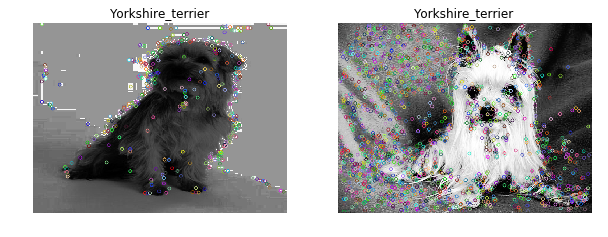

In [215]:
import p7_util
p7_util.p7_image_pil_show(dict_breed_kpdesc_image,std_image_size=None)


Those pictures show that uniform background leads Key points to be focused on dog border and dog details

#### Drawing matches

In [199]:
# list_kpdesc contains tuples (kp,desc)
kp1 = list_kpdesc[0][0]
kp2 = list_kpdesc[1][0]
desc1 = list_kpdesc[0][1]
desc2 = list_kpdesc[1][1]
image_pil_gray_equalized1 = dict_pil_image['equalize'][0][0]
image_pil_gray_equalized2 = dict_pil_image['equalize'][1][0]

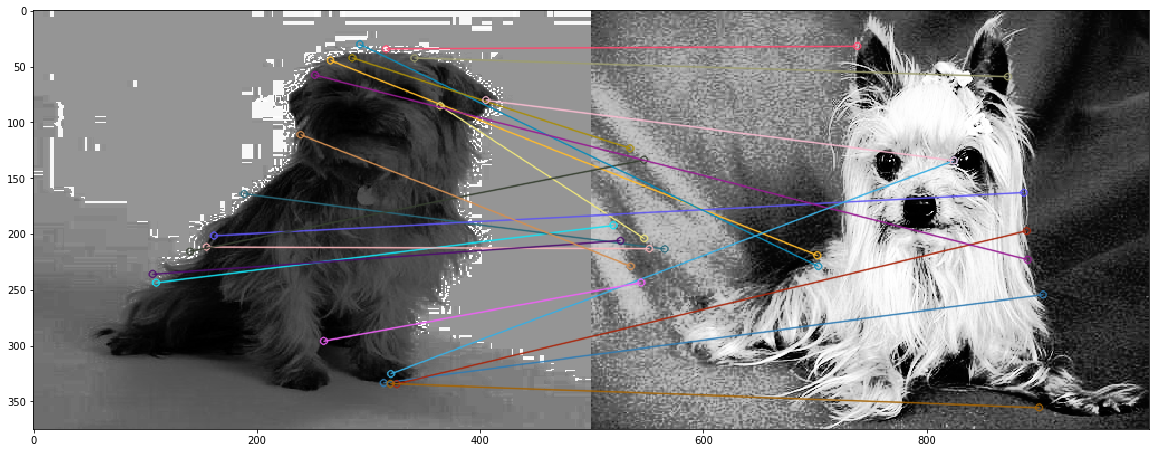

In [217]:
import cv2

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2SQR, crossCheck=True)
# Match descriptors.
matches = bf.match(desc1,desc2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

import cv2
import matplotlib.pyplot as plt
image_pil_gray_equalized3 = image_pil_gray_equalized1
# Draw first 10 matches.
image_pil_gray_equalized3 = cv2.drawMatches(np.array(image_pil_gray_equalized1),kp1\
                                           ,np.array(image_pil_gray_equalized2),kp2\
                                            ,matches[:20],np.array(image_pil_gray_equalized3), flags=2)

plt.figure(figsize=(20,10))
z_=plt.imshow(image_pil_gray_equalized3),plt.show()

## <font color='blus'>1.4. Building descriptors on a single splitted image</font>

#### An object that aims to hold a single image is built

In [813]:
import P7_DataBreed
oP7_DataBreed_single = P7_DataBreed.P7_DataBreed()

#### Image structures are copied into `oP7_DataBreed_single` object

In [814]:
oP7_DataBreed_single._dict_breed_sample=oP7_DataBreed._dict_breed_sample.copy()
oP7_DataBreed_single.show()


 
Path to data directory ........ : ./data/Images
Number of breeds .............. : 0
Total number of images ........ : 0
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 0
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Number of splitted images .... : 0



#### Images and breeds is shown 

This aims to select an image among list provided by a breed.

List of breeds is displayed in a human readable manner along with directories.

In [815]:
oP7_DataBreed.show_breed_name()

standard_poodle ..... : n02113799-standard_poodle
Saint_Bernard ..... : n02109525-Saint_Bernard
African_hunting_dog ..... : n02116738-African_hunting_dog
boxer ..... : n02108089-boxer
Doberman ..... : n02107142-Doberman
Cardigan ..... : n02113186-Cardigan



#### A breed name is picked from list

In [816]:
oP7_DataBreed._dict_breed_sample.keys()

dict_keys([])

#### Sample is restricted to a assigned list of image with a single element

This allows to apply building descriptors methods for a single image.

In [817]:
breedname  = 'Doberman'
image_name = 'n02107142_16917.jpg'
#list_restricted_image = [(breedname,image_name),('Saint_Bernard','n02109525_3360.jpg')]
list_restricted_image = [(breedname,[image_name])]

oP7_DataBreed_single.list_restricted_image = list_restricted_image
oP7_DataBreed_single.show()


 
Path to data directory ........ : ./data/Images
Number of breeds .............. : 0
Total number of images ........ : 0
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 0
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 1
Number of splitted images .... : 0



#### Image from object is splitted and KP are computed for each image part

In [818]:
oP7_DataBreed_single.build_sift_desc(is_splitted=True)

oP7_DataBreed_single.show()

200 200
(217, 217)
Images processed= 16

INFO : Error = 0 Total images processed= 16

 
Path to data directory ........ : ./data/Images
Number of breeds .............. : 0
Total number of images ........ : 0
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 16
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : True
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 1
Number of splitted images .... : 4



#### Splitted image below aims to be displayed with KP

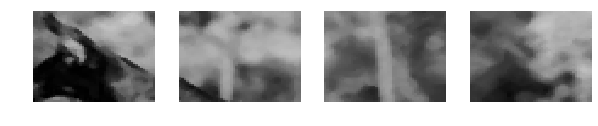

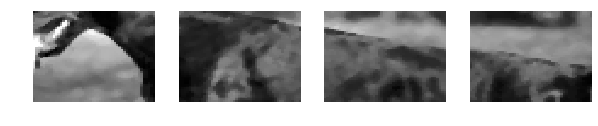

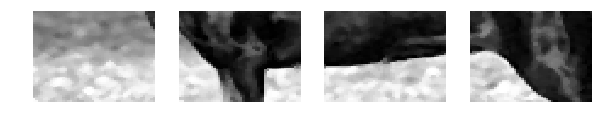

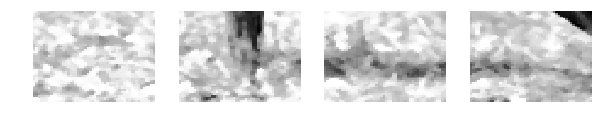

In [567]:
import p7_util
p7_util.p7_image_pil_show(oP7_DataBreed_single.dict_split_pil_image,std_image_size=(500,375), is_title=False)

#### Building dictionaries for drawing invariant Key points for each splitted image

`dict_breed_kpdesc_image` is structured as following : `{breedname:list_of_arrays}`

where :

 * `list_of_arrays` is the list of array issued from `cv2.drawKeypoints()`
 
 The number of arrays is fixed by count of $raw\times col$ where :
 * $raw$ is the number of raws issued from splitted image
 * $col$ is the number of columns issued from splitted image

In [766]:
import P7_DataBreed

dict_kp_count = dict()
list_image_pil = list()
dict_pil_image_ = dict()
list_kpdesc = list()

dict_pil_image = oP7_DataBreed_single.dict_split_pil_image

for list_pil_image in dict_pil_image.values():
    for pil_image in list_pil_image :
        list_image_pil.append(pil_image)
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image)
        list_kpdesc.append((kp, desc))
    
dict_pil_image_   = {breedname:list_image_pil}
dict_breed_kpdesc = {breedname:list_kpdesc}

In [904]:
print(len(list_breed_kpdesc))

42


In [768]:
import cv2

dict_breed_kpdesc_image = dict()
dict_breed_kp_image = dict()
count=0
for (breed, list_breed_kpdesc), list_image_pil in zip(dict_breed_kpdesc.items(), dict_pil_image_.values()):
    count +=1
    dict_breed_kpdesc_image[breed] = [cv2.drawKeypoints(np.array(image_pil), kp, np.array(image_pil)) \
                             for ((kp, desc),image_pil) in zip(list_breed_kpdesc,list_image_pil)]

#### Key points are drawned along with splitted images

Dictionary hold a single key, the breed name.

Flatten array in dictionary, containing KP to be displayed is splitted as $raw$ raws and $col$ columns. 

Result is stored into `arr_`variable.

Processing during SIFT descriptors building has lead to truncate each image as a square. Then the number of raws is equal to the number of columns.



In [769]:
breedname = list(dict_breed_kpdesc_image.keys())[0]

arr_= np.array(dict_breed_kpdesc_image[breedname])
raw = int(np.sqrt(arr_.shape[0]))
col = raw

`dict_breed_kpdesc_image_raw` will feed `p7_util.p7_image_pil_show` function.

It is structured as following : `{raw:list_col_image}` where :
* `list_col_image` is the column of images for `raw`.

In [770]:
#arr_= np.array(dict_breed_kpdesc_image[breedname])
dict_breed_kpdesc_image_raw = dict()
col_start = 0
for i_raw in range(0,raw) :
    col_end = col_start+col
    dict_breed_kpdesc_image_raw.update({i_raw:arr_[col_start:col_end,::,::,::]})
    col_start =col_end


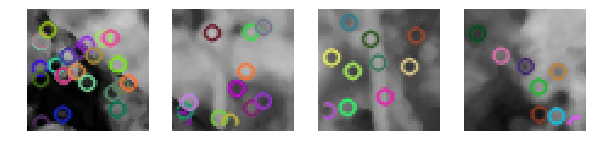

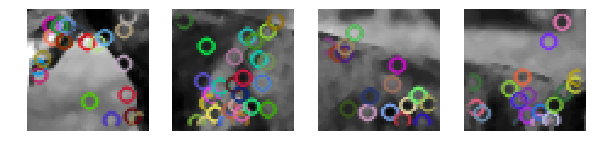

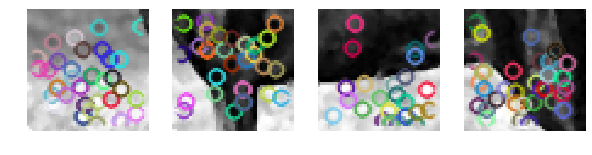

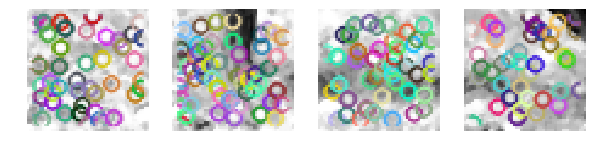

In [771]:
import p7_util
p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                          ,size_x=10,std_image_size=None,is_title=False)

#### For each splitted image, KP occurencies is computed

`list_breed_kpdesc` contains KP for each split image.

It is a flatten array. KP occurency is computed and stored into the dataframe `df_kp`.



In [772]:
dict_kp_occurency = dict()
for i_raw in range(0,len(list_breed_kpdesc)) :
    tuple_kp_image = list_breed_kpdesc[i_raw]
    dict_kp_occurency[i_raw] = len(tuple_kp_image[0])

ser = pd.Series(dict_kp_occurency)
df_kp = pd.DataFrame([ser]).T.rename(columns={0:'count'})


#### Threashold is computed in order to filter splitted images.

Dataframe `df_kp` is used to compute threashold and to build filter from this threashold used to keep images.

Q1   = 21.25
Q3   = 41.75
Zmin = 10.0
Zmax = 67.0


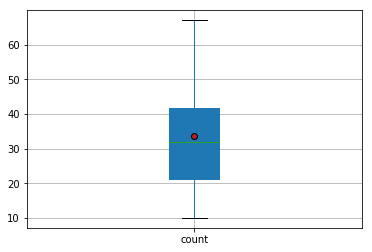

In [773]:
import p3_util
import p3_util_plot


p3_util_plot.df_boxplot_display(df_kp, 'count')

q1,q3,zmin,zmax = p3_util.df_boxplot_limits(df_kp , 'count')
print("Q1   = "+str(q1))
print("Q3   = "+str(q3))
print("Zmin = "+str(zmin))
print("Zmax = "+str(zmax))


In [793]:
df_kp_filtered = df_kp[df_kp['count']<int(q3)]
df_kp_filtered = df_kp_filtered[df_kp_filtered['count']>int(q1)]


[0, 4, 5, 7, 8, 9, 10, 11]

#### Splitted images with are filtered against `list_index_filtered`

In [794]:
dict_breed_kpdesc_image_raw = dict_breed_kpdesc_image_raw_save.copy()
list_filtered_index = list(df_kp_filtered.index)
index=0
for i_raw in range(0,raw):
    col = dict_breed_kpdesc_image_raw[i_raw].shape[0]
    #arr_ = np.zeros((4,50,50,3))
    for i_col in range(0,col):
        if index in list_filtered_index :
            pass
        else :
            # Image index out of filter is erased 
            dict_breed_kpdesc_image_raw[i_raw][i_col] =np.zeros((50,50,3))
        index += 1
            

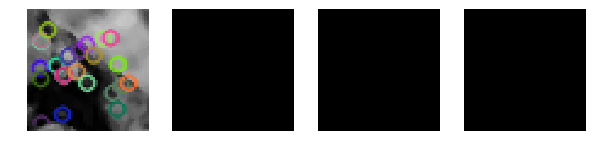

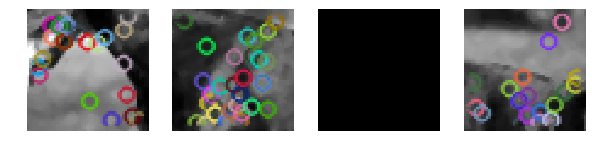

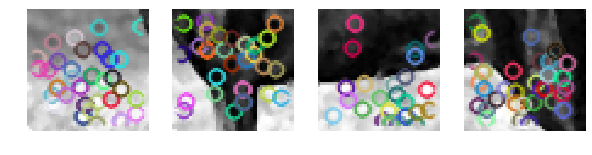

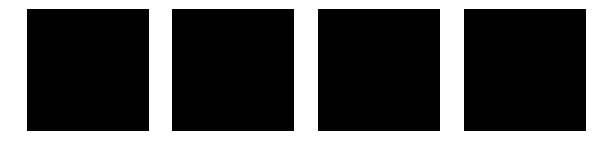

In [795]:
import p7_util
if True :
    p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                              ,size_x=10,std_image_size=None,is_title=False)

### Applying KP filtering process on another image

#### An object that aims to hold a single image is built

In [992]:
import cv2

import p3_util
import p3_util_plot


import P7_DataBreed
import p7_util

oP7_DataBreed_single = P7_DataBreed.P7_DataBreed()

oP7_DataBreed_single._dict_breed_sample=oP7_DataBreed._dict_breed_sample.copy()


breedname  = 'Doberman'
image_name = 'n02107142_7300.jpg'
image_name = 'n02107142_7237.jpg'
image_name = 'n02107142_278.jpg'
image_name = 'n02107142_15936.jpg'
image_name = 'n02107142_12191.jpg'
image_name = 'n02107142_16917.jpg'

list_restricted_image = [(breedname,[image_name])]

oP7_DataBreed_single.list_restricted_image = list_restricted_image

oP7_DataBreed_single.build_sift_desc(is_splitted=True)

Images processed= 25

INFO : Error = 0 Total images processed= 25


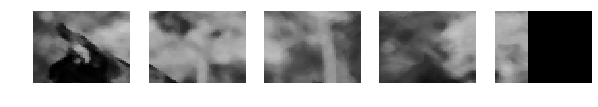

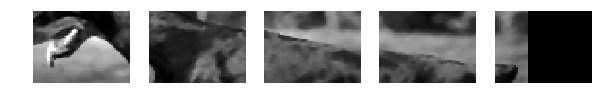

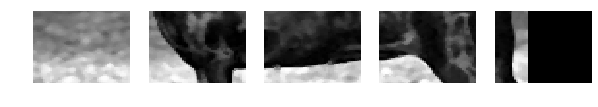

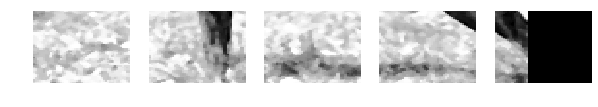

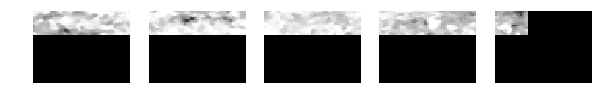

In [993]:
p7_util.p7_image_pil_show(oP7_DataBreed_single.dict_split_pil_image,std_image_size=(500,375), is_title=False)

In [1003]:
len(dict_pil_image)

5

In [994]:
dict_kp_count = dict()
list_image_pil = list()
dict_pil_image_ = dict()
list_kpdesc = list()

dict_pil_image = oP7_DataBreed_single.dict_split_pil_image
print(len(dict_pil_image))

for list_pil_image in dict_pil_image.values():
    for pil_image in list_pil_image :
        list_image_pil.append(pil_image)
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image)
        list_kpdesc.append((kp, desc))
    
dict_pil_image_={breedname:list_image_pil}
dict_breed_kpdesc={breedname:list_kpdesc}


dict_breed_kpdesc_image = dict()
dict_breed_kp_image = dict()
count=0
for (breed, list_breed_kpdesc), list_image_pil in zip(dict_breed_kpdesc.items(), dict_pil_image_.values()):
    count +=1
    dict_breed_kpdesc_image[breed] = [cv2.drawKeypoints(np.array(image_pil), kp, np.array(image_pil)) \
                             for ((kp, desc),image_pil) in zip(list_breed_kpdesc,list_image_pil)]

arr_= np.array(dict_breed_kpdesc_image[breedname])
raw = int(np.sqrt(arr_.shape[0]))
col = raw

#arr_= np.array(dict_breed_kpdesc_image[breedname])
dict_breed_kpdesc_image_raw = dict()
col_start = 0
for i_raw in range(0,raw) :
    col_end = col_start+col
    dict_breed_kpdesc_image_raw.update({i_raw:arr_[col_start:col_end,::,::,::]})
    col_start =col_end

5


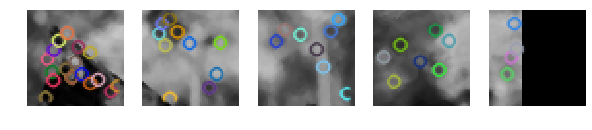

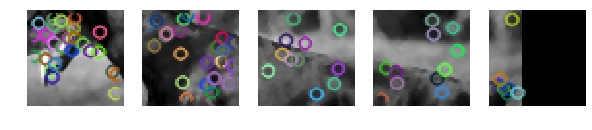

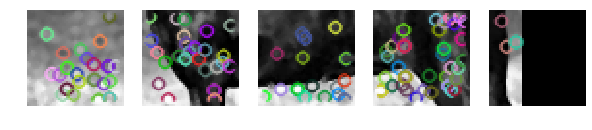

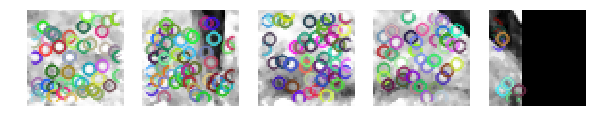

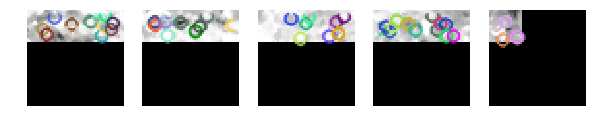

In [995]:
p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                          ,size_x=10,std_image_size=None,is_title=False)

In [996]:
dict_kp_occurency = dict()
for i_raw in range(0,len(list_breed_kpdesc)) :
    tuple_kp_image = list_breed_kpdesc[i_raw]
    dict_kp_occurency[i_raw] = len(tuple_kp_image[0])

ser = pd.Series(dict_kp_occurency)
df_kp = pd.DataFrame([ser]).T.rename(columns={0:'count'})
#df_kp

Q1   = 10.0
Q3   = 30.0
Zmin = 3.0
Zmax = 60.0


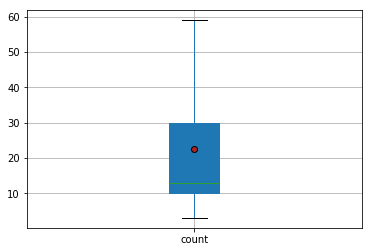

In [997]:
p3_util_plot.df_boxplot_display(df_kp, 'count')

q1,q3,zmin,zmax = p3_util.df_boxplot_limits(df_kp , 'count')
print("Q1   = "+str(q1))
print("Q3   = "+str(q3))
print("Zmin = "+str(zmin))
print("Zmax = "+str(zmax))

In [1000]:
kp_min=zmin
kp_max=q3

df_kp_filtered = df_kp[df_kp['count']<int(kp_max)]
df_kp_filtered = df_kp_filtered[df_kp_filtered['count']>int(kp_min)]
if False :
    dict_breed_kpdesc_image_raw_save = dict_breed_kpdesc_image_raw.copy()
    dict_breed_kpdesc_image_raw = dict_breed_kpdesc_image_raw_save.copy()
list_filtered_index = list(df_kp_filtered.index)

index=0
for i_raw in range(0,raw):
    col = dict_breed_kpdesc_image_raw[i_raw].shape[0]
    #arr_ = np.zeros((4,50,50,3))
    for i_col in range(0,col):
        if index in list_filtered_index :
            pass
        else :
            # Image index out of filter is erased 
            dict_breed_kpdesc_image_raw[i_raw][i_col] =np.zeros((50,50,3))
        index += 1

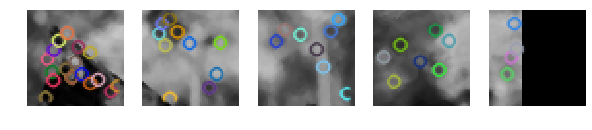

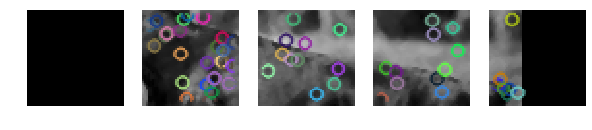

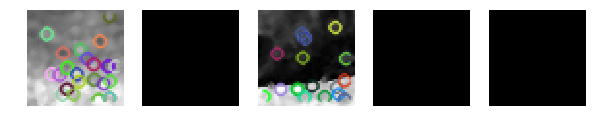

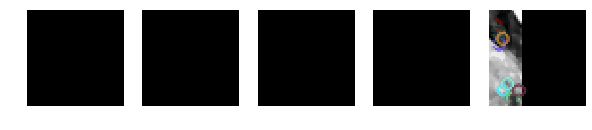

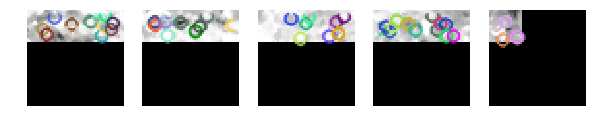

In [1001]:
            
p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                          ,size_x=10,std_image_size=None,is_title=False)

### <font color='blus'>Applying KP filtering process on all images</font>

In [1004]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/EasyImages')
oP7_DataBreed.load()
oP7_DataBreed.std_size_build()
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Image descriptors count .. : 0
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Number of splitted images .... : 0



## <font color='blus'>Sampling the dataset</font>

In [1005]:
breed_count=10
image_per_breed_count=10
oP7_DataBreed.std_size=None

oP7_DataBreed.sampling(breed_count, image_per_breed_count)
oP7_DataBreed.show()

Building...

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : None
SIFT Image descriptors count .. : 0
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 10
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 7
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Number of splitted images .... : 0



#### Image from object is splitted and KP are computed for each image part

In [979]:
dirbreed='n02108089-boxer'
imagename='n02108089_836.jpg'
print(oP7_DataBreed._dict_breed_sample[dirbreed])

imagepathname = oP7_DataBreed._build_pathname(dirbreed, imagename)
pil_image = p7_util.p7_pil_image_load(imagepathname\
, is_verbose=False, std_size=None)

['n02108089_1757.jpg', 'n02108089_13526.jpg', 'n02108089_1003.jpg', 'n02108089_1619.jpg', 'n02108089_78.jpg', 'n02108089_4989.jpg', 'n02108089_836.jpg', 'n02108089_14659.jpg', 'n02108089_11875.jpg', 'n02108089_1031.jpg']


In [980]:
pil_image.size

(500, 333)

In [1006]:
oP7_DataBreed.build_sift_desc(is_splitted=True)
oP7_DataBreed.show()

Images processed= 25
Images processed= 50
Images processed= 66
Images processed= 82
Images processed= 107
Images processed= 132
Images processed= 157
Images processed= 182
Images processed= 207
Images processed= 232
Images processed= 257
Images processed= 282
Images processed= 307
Images processed= 332
Images processed= 357
Images processed= 382
Images processed= 407
Images processed= 432
Images processed= 457
Images processed= 473
Images processed= 498
Images processed= 523
Images processed= 539
Images processed= 564
Images processed= 589
Images processed= 605
Images processed= 621
Images processed= 637
Images processed= 662
Images processed= 687
Images processed= 712
Images processed= 737
Images processed= 762
Images processed= 787
Images processed= 812
Images processed= 837
Images processed= 862
Images processed= 887
Images processed= 912
Images processed= 937
Images processed= 953
Images processed= 978
Images processed= 1003
Images processed= 1028
Images processed= 1053
Images proc

In [1008]:
dict_kp_count = dict()
list_image_pil = list()
dict_pil_image_ = dict()
list_kpdesc = list()

dict_pil_image = oP7_DataBreed.dict_split_pil_image
print(len(dict_pil_image))

for list_pil_image in dict_pil_image.values():
    for pil_image in list_pil_image :
        list_image_pil.append(pil_image)
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image)
        list_kpdesc.append((kp, desc))


165


In [ ]:
oP7_DataBreed_single.kp_filter()

In [796]:
oP7_DataBreed_single.build_arr_desc()

oP7_DataBreed_single.show()


 
Path to data directory ........ : ./data/Images
Number of breeds .............. : 0
Total number of images ........ : 0
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 16
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : True
Key point descriptors ......... : (537, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 1
Number of splitted images .... : 4



# <font color='blus'>2. Analysis with images filtered by hand</font>

## <font color='blus'>2.1. Loading the whole dataset</font>

In [9]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/EasyImages')
oP7_DataBreed.load()
oP7_DataBreed.std_size_build()

oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Image descriptors count .. : 0
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []



## <font color='blus'>2.2. Sampling the dataset</font>

In [102]:
import P7_DataBreed

breed_count=10
image_per_breed_count=20
oP7_DataBreed.std_size=(200,200)

oP7_DataBreed.sampling(breed_count, image_per_breed_count)

oP7_DataBreed.build_sift_desc(is_splitted=True)
oP7_DataBreed.show()


INFO : dictionary already built!
Images processed= 9
Images processed= 73
Images processed= 109
Images processed= 173
Images processed= 273
Images processed= 289
Images processed= 338
Images processed= 402
Images processed= 427
Images processed= 452
Images processed= 501
Images processed= 550
Images processed= 631
Images processed= 680
Images processed= 729
Images processed= 793
Images processed= 842
Images processed= 906
Images processed= 987
Images processed= 1003
Images processed= 1103
Images processed= 1167
Images processed= 1231
Images processed= 1267
Images processed= 1331
Images processed= 1431
Images processed= 1480
Images processed= 1544
Images processed= 1593
Images processed= 1642
Images processed= 1723
Images processed= 1772
Images processed= 1821
Images processed= 1902
Images processed= 1966
Images processed= 2015
Images processed= 2064
Images processed= 2145
Images processed= 2209
Images processed= 2273
Images processed= 2322
Images processed= 2358
Images processed= 2374

## <font color='blus'>2.3. Building array of all Key points descriptors</font>

In [103]:
oP7_DataBreed.build_arr_desc()

oP7_DataBreed.show()

Processed raws= 1000/7200
Processed raws= 2000/7200
Processed raws= 3000/7200
Processed raws= 4000/7200
Processed raws= 5000/7200
Processed raws= 6000/7200
Processed raws= 7000/7200

*** WARN : Nb of exceptions during process ... : 696

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 7200
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 20
X train size .................. : (649, 19)
y train size .................. : (649, 7)
X test size ................... : (73, 19)
y test size ................... : (73, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (163839, 128)
Cla

In [108]:
filename = './data/oP7_DataBreed.dump'
p5_util.object_dump(oP7_DataBreed,filename)

## <font color='blus'>2.4. GMM clustering</font>

In [15]:
import p5_util
import P7_DataBreed

df_desc = oP7_DataBreed.df_desc
cluster_start = 1
cluster_end = 20

filename='./data/dict_list_gmm_model_'+str(cluster_end)+'_splited_clusters_2.dump'

dict_hyper_parameter={'covariance_type':['diag','spherical','full']}
#dict_hyper_parameter={'covariance_type':['full']}
t_range_cluster = (cluster_start, cluster_end)
dict_list_gmm_model = p5_util.gmm_hyper_parameter_cv(df_desc, t_range_cluster ,dict_hyper_parameter)

p5_util.object_dump(dict_list_gmm_model,filename)

Clustering from clusters range from : 1 --> 20
GMM Hyper-parameter type= covariance_type
Hyper parameter value : diag


/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % 

Hyper parameter value : spherical
Hyper parameter value : full


/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


p5_util.object_load : fileName= ./data/dict_list_gmm_model_20_splited_clusters_2.dump


<Figure size 1008x504 with 0 Axes>

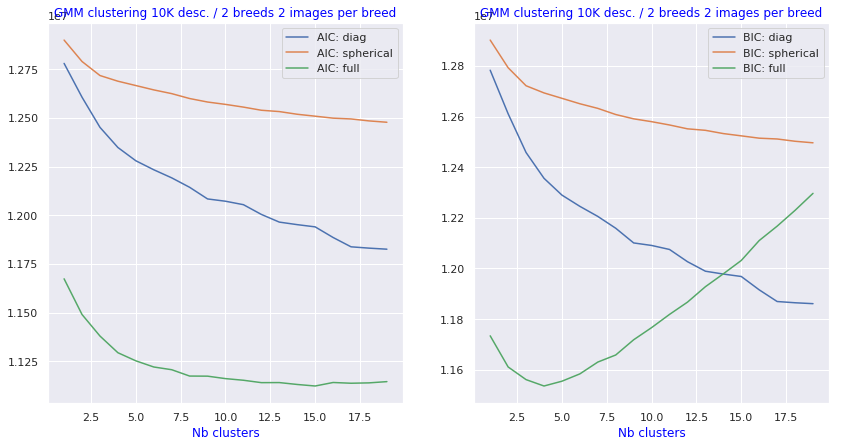

In [16]:
import p5_util
import p5_util_plot

dict_list_gmm_model = p5_util.object_load(filename)

p_figsize = (14,7)
t_range_cluster = (cluster_start, cluster_end)
breed_count = oP7_DataBreed._sampling_breed_count
img_per_breed=oP7_DataBreed._sampling_image_per_breed_count
p_title = 'GMM clustering 10K desc. / 2 breeds 2 images per breed'
p5_util_plot.gmm_models_plot_AIC_BIC(df_desc, dict_list_gmm_model, t_range_cluster, p_figsize, p_title)

In [17]:
df_desc = oP7_DataBreed.df_desc
df_desc.shape

(10209, 128)

In [18]:
import p5_util
df_desc = oP7_DataBreed.df_desc
dict_dict_silhouette_score = p5_util.gmm_silhouette_compute(df_desc, dict_list_gmm_model)

filename = './data/dict_dict_silhouette_score_20_splitted_breeds.dump'
p5_util.object_dump(dict_dict_silhouette_score,filename)


GMM Silhouette score: Hyper-parameter=diag
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10
GMM Silhouette score: Cluster= 11
GMM Silhouette score: Cluster= 12
GMM Silhouette score: Cluster= 13
GMM Silhouette score: Cluster= 14
GMM Silhouette score: Cluster= 15
GMM Silhouette score: Cluster= 16
GMM Silhouette score: Cluster= 17
GMM Silhouette score: Cluster= 18
GMM Silhouette score: Cluster= 19

GMM Silhouette score: Hyper-parameter=spherical
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10
GMM Si

p5_util.object_load : fileName= ./data/dict_dict_silhouette_score_20_splitted_breeds.dump


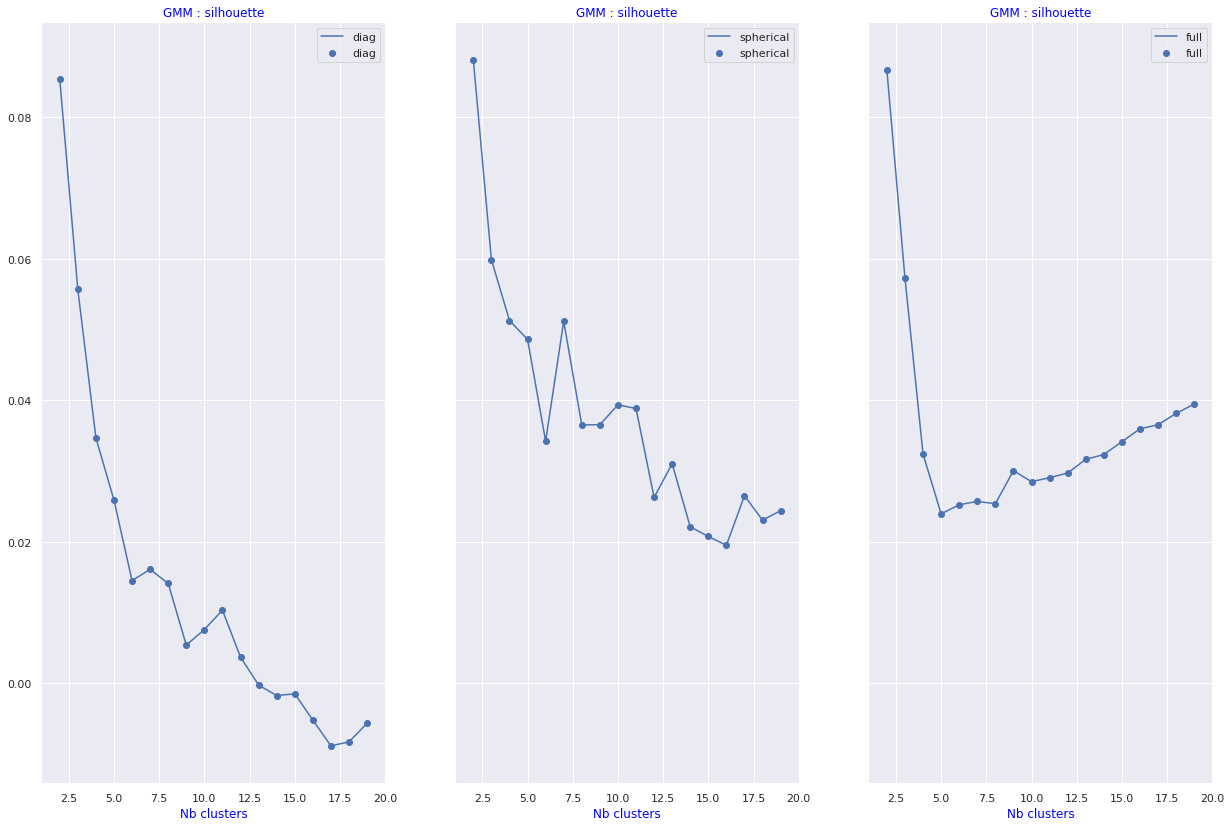

In [19]:
import p5_util_plot
filename = './data/dict_dict_silhouette_score_20_splitted_breeds.dump'
dict_dict_silhouette_score = p5_util.object_load(filename)


p_figsize=(21,14)
areas_raws =1
areas_colums =3
p_title = "GMM : silhouette"
p5_util_plot.gmm_models_plot_silhouette(df_desc, dict_dict_silhouette_score\
, p_figsize, p_title, areas_raws, areas_colums)

(10209, 128)
(10209, 129)
Clusters = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Population cumulée par cluster = 10209
         Count
cluster       
16        1147
5          946
2          731
13         689
6          658
17         639
3          618
7          516
15         491
1          457
9          445
11         441
10         429
0          417
14         358
18         343
8          327
4          284
12         273


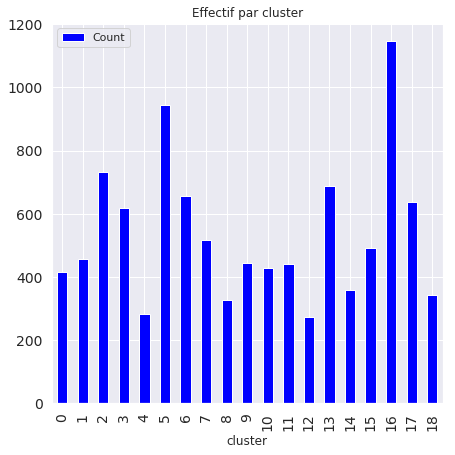

In [22]:
import p5_util
import p5_util_plot

#-----------------------------------------------------------------------------------
# Best GMM model is updated
#-----------------------------------------------------------------------------------
p_covariance_type = 'diag'
n_cluster = 20
list_gmm_model = dict_list_gmm_model[p_covariance_type]
for gmm_model in list_gmm_model:
    if n_cluster == gmm_model.n_components:
        break
gmm_model

#-----------------------------------------------------------------------------------
# Dictionary of clusters model is updated
#-----------------------------------------------------------------------------------
oP7_DataBreed.dict_cluster_model = {'GMM':gmm_model}

if 'cluster' in df_desc.columns:
    del(df_desc['cluster'])
    
#-----------------------------------------------------------------------------------
# Data values (descriptors) are assigned to clusters
#-----------------------------------------------------------------------------------
pred_gmm = gmm_model.predict(df_desc.values)
print(df_desc.shape)

df_desc = p5_util.df_add_cluster(df_desc, pred_gmm)
print(df_desc.shape)

#-----------------------------------------------------------------------------------
# Histogram for assignement is displayed
#-----------------------------------------------------------------------------------
p5_util_plot.plot_cluster_frequency(df_desc)

In [27]:
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 928
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 2
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : True
Key point descriptors ......... : (10209, 128)
Classifier name ............... : 
Supported classifiers ......... : []



## <font color='blus'>2.5. DBSCAN clustering</font>

In [28]:
oP7_DataBreed.X_train.shape,oP7_DataBreed.X_test.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
import p3_util_plot
X_train = oP7_DataBreed.X_train
X_test = oP7_DataBreed.X_test
labels_trained, labels_predicted \
= p3_util_plot.clustering_dbscan_plot_and_metrics(X_train, X_test,parameter_eps=3,parameter_min_samples=10) 

(3188, 19)
DBSCAN : estimation du nombre de clusters : 1


<p><font color='red'>**DBSCAN : cluster bruité!**</font></p>

## <font color='blus'>2.6. t-SNE</font>

In [ ]:
import p5_util

df_desc = oP7_DataBreed.df_desc
dict_tsne_result = p5_util.tsne_2D_process_perplexity(df_desc)

# <font color='blus'>3. Supervized model </font>

## <font color='blus'>3.1. Building model </font>

In [42]:
oP7_DataBreed.build_dict_breedname_id()


INFO : dictionary already built!


#### `GMM` model is used

In [34]:
oP7_DataBreed.cluster_model_name='GMM'
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 928
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 2
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : True
Key point descriptors ......... : (10209, 128)
Classifier name ............... : 
Supported classifiers ......... : []



#### Building a bag of features

In [35]:
oP7_DataBreed._dict_breed_kpdesc[0][1]

'Great_Pyrenees'

In [41]:
oP7_DataBreed._ser_breed_number

0         Great_Pyrenees
1       Mexican_hairless
2                  dhole
3                  boxer
4               malinois
5    African_hunting_dog
6      Yorkshire_terrier
dtype: object

In [47]:
print(oP7_DataBreed.get_breedlabel_from_breedname('boxer'))

print(oP7_DataBreed.get_breedname_from_breedlabel(3))

3
boxer


In [593]:
oP7_DataBreed._dict_breedname_id

{'Doberman': 'n02107142',
 'African_hunting_dog': 'n02116738',
 'malinois': 'n02105162',
 'standard_poodle': 'n02113799',
 'dingo': 'n02115641',
 'Saint_Bernard': 'n02109525',
 'boxer': 'n02108089'}

In [70]:
import p5_util
import P7_DataBreed

dict_label = oP7_DataBreed.build_datakp_bof()
oP7_DataBreed.show()


***Nb of errors..............= 0

***Nb of labelized images ...= 722
Number of referenced labels= 7
Number of labels to be encoded= 722

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 722
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 2
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (10209, 128)
Classifier name ............... : 
Supported classifiers ......... : []



In [56]:
import numpy as np
np.unique(oP7_DataBreed._y_label)
oP7_DataBreed._y_label

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [641]:
import p5_util
filename = './data/oP7_DataBreed.dump'
p5_util.object_dump(oP7_DataBreed,filename)

#### We check all BOF vectors are normalized

In [57]:
oP7_DataBreed.df_bof.apply(lambda x: x.dot(x.T), axis=0)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
dtype: float64

In [72]:
oP7_DataBreed.y_label.shape

(722, 7)

## <font color='blus'>3.2. Model evaluation </font>

In [73]:
import P7_DataBreed

oP7_DataBreed.train_test_build(size_test=0.1)
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 722
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 2
X train size .................. : (649, 19)
y train size .................. : (649, 7)
X test size ................... : (73, 19)
y test size ................... : (73, 7)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (722, 19)
Labels from dataset ........... : (722, 7)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (10209, 128)
Classifier name ............... : 
Supported classifiers ......... : []



#### We make sure y_test and y_train vectors hold all classes.

In [74]:
np.unique(oP7_DataBreed.y_test),np.unique(oP7_DataBreed.y_train)

(array([0, 1]), array([0, 1]))

### <font color='blus'>3.2.1. Data model benchmark with supervized algorithm </font>

In [87]:
is_dumped = False

In [88]:
if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    dict_cls_score = p5_util.object_load(filename)

    filename = './data/best_dict_classifier.dump'
    dict_classifier = p5_util.object_load(filename)
else :
    dict_cls_score = dict()
    dict_classifier = dict()

#### <font color='blus'>Evaluation with hyper-parameter `multi_class='multinomial'`</font>

In [89]:
from sklearn.linear_model import LogisticRegression
import p5_util
import p6_util
import P7_DataBreed

dict_param_grid = {
    'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 1.e-1, accuracy=0.41
    #'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 0.1, accuracy=0.41
    #'estimator__C': [1.e-4, 1.e-3, 1.e-2, ], # Best classifier: 0.1, accuracy=0.41
    'estimator__solver':['newton-cg', 'lbfgs' ,'sag'],
    'estimator__penalty': ['l2'],
    'n_jobs': [-1]
}
cls_name = 'L.R. + multinomial'

dict_cls_score = dict()
X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
classifier = LogisticRegression(multi_class='multinomial',solver='newton-cg')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

classifier  = gscv_classifier.best_estimator_
best_score_ = gscv_classifier.best_score_

dict_classifier[cls_name]=classifier
dict_cls_score[cls_name] = best_score_


if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)


dict_cls_score

(649, 19) (649, 7) (73, 19) (73, 7)
0.015408320493066256
{'estimator__C': 1.5, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg', 'n_jobs': -1}


{'L.R. + multinomial': 0.015408320493066256}

#### <font color='blus'>Evaluation of Logictic regression with hyper-parameter `multi_class='ovr'`</font>

In [90]:
from sklearn.linear_model import LogisticRegression
import p5_util
import p6_util
import P7_DataBreed

dict_param_grid = {
    #'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 1.5, accuracy=0.27
    #'estimator__C': [ 1.5, 2.0, 2.5], # Best classifier: 2.5, accuracy>0.27
    #'estimator__C': [2.5, 5.0, 10., ], # Best classifier: 10.0 , accuracy=0.28
    #'estimator__C': [10., 50., 100., ], # Best classifier: 100.0 , accuracy=0.29
    'estimator__C': [90.,100., 110.,], # Best classifier: 90.0 , accuracy=0.287
    'estimator__solver':['newton-cg', 'lbfgs' ,'sag','liblinear'],
    #'estimator__solver':[ 'saga','liblinear'],
    'estimator__penalty': ['l2'],
    'n_jobs': [-1]
}
cls_name = 'L.R. + ovr'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
classifier = LogisticRegression(multi_class='ovr')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=False)

classifier  = gscv_classifier.best_estimator_
best_score_ = gscv_classifier.best_score_

dict_classifier[cls_name]=classifier
dict_cls_score[cls_name] = best_score_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

(649, 19) (649, 7) (73, 19) (73, 7)
0.06314359674574728
{'estimator__C': 100.0, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear', 'n_jobs': -1}


{'L.R. + multinomial': 0.015408320493066256, 'L.R. + ovr': 0.06314359674574728}

#### <font color='blus'>Evaluation of Bernoulli NB </font>

In [91]:
dict_cls_score

{'L.R. + multinomial': 0.015408320493066256, 'L.R. + ovr': 0.06314359674574728}

In [92]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import p6_util

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

if False :
    scaler = StandardScaler()
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test) 

classifier = BernoulliNB()
cls_name = 'Bernoulli NB'

dict_param_grid = {
    #'estimator__alpha': [ 1.e-4, 5.e-4, 1.e-3, 5.e-3, 1.e-2, 5.e-2, 1.e-1], # Best result : alfa=1E-4
    'estimator__alpha': [ 1.e-4, ], #
    'n_jobs': [-1]
}
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score


0.16486902927580893
{'estimator__alpha': 0.0001, 'n_jobs': -1}


{'L.R. + multinomial': 0.015408320493066256,
 'L.R. + ovr': 0.06314359674574728,
 'Bernoulli NB': 0.16486902927580893}

#### <font color='blus'>Evaluation of Multinomial NB</font>

In [93]:
from sklearn.naive_bayes import MultinomialNB

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

cls_name = 'Multinomial NB'
classifier = MultinomialNB()
dict_param_grid = {
    #'estimator__alpha': [ 1.e-3, 5.e-2, 1.e-1, 5.e-1, 1.], #1.e-3 : Accuracy 0.0
    'estimator__alpha': [ 1.e-5, 1.e-4, 1.e-3,], #1.e-3 : Accuracy 0.0
    'n_jobs': [-1]
}

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)
dict_cls_score

0.0
{'estimator__alpha': 1e-05, 'n_jobs': -1}


{'L.R. + multinomial': 0.015408320493066256,
 'L.R. + ovr': 0.06314359674574728,
 'Bernoulli NB': 0.16486902927580893,
 'Multinomial NB': 0.0}

#### <font color='blus'>Evaluation of Gaussian NB</font>

In [94]:
from sklearn.naive_bayes import GaussianNB
from scipy import sparse


X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

cls_name = 'Gaussian NB'
classifier = GaussianNB()

dict_param_grid = dict()
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)
dict_cls_score

0.09244992295839753
{}


{'L.R. + multinomial': 0.015408320493066256,
 'L.R. + ovr': 0.06314359674574728,
 'Bernoulli NB': 0.16486902927580893,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.09244992295839753}

#### <font color='blus'>Linear SVC</font>

In [95]:
from sklearn.svm import LinearSVC

nb_estimators=100
cls_name = 'Linear SVC'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

dict_param_grid = {
        #'estimator__C': [ 1e-1,5e-1,1.,0.5,10], # 10 / 0.282%
        #'estimator__C': [ 10,20,30], # 30 / 0.283%
        'estimator__C': [ 30, 50,100,200], # 100 / 0.283%
        'n_jobs': [-1]
}
classifier = LinearSVC(multi_class='ovr')

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

0.06471494607087827
{'estimator__C': 200, 'n_jobs': -1}


{'L.R. + multinomial': 0.015408320493066256,
 'L.R. + ovr': 0.06314359674574728,
 'Bernoulli NB': 0.16486902927580893,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.09244992295839753,
 'Linear SVC': 0.06471494607087827}

#### <font color='blus'>Random Forest</font>

In [96]:
from sklearn.ensemble import RandomForestClassifier
cls_name = 'Random Forest'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
dict_param_grid = {
    #'estimator__n_estimators': [ 100, 200, 300,], # 100, accuracy=0.295
    #'estimator__n_estimators': [ 10,50,90,100,110], # 10, accuracy=0.297
    'estimator__n_estimators': [ 5,9,10,11,15], # 10, accuracy=0.297
}
classifier = RandomForestClassifier()

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

0.1263482280431433
{'estimator__n_estimators': 5}


{'L.R. + multinomial': 0.015408320493066256,
 'L.R. + ovr': 0.06314359674574728,
 'Bernoulli NB': 0.16486902927580893,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.09244992295839753,
 'Linear SVC': 0.06471494607087827,
 'Random Forest': 0.1263482280431433}

#### <font color='blus'>Kernel Ridge Classfier</font>

In [97]:
from sklearn.linear_model import RidgeClassifier

cls_name = 'Kernel Ridge'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
dict_param_grid = {
    'estimator__alpha': [ 0.1,1.,10.],# 0.1 / 0.281%
    'n_jobs': [-1]
}
cls_name='KR Classifier'
classifier = RidgeClassifier()

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

0.05238828967642527
{'estimator__alpha': 0.1, 'n_jobs': -1}


{'L.R. + multinomial': 0.015408320493066256,
 'L.R. + ovr': 0.06314359674574728,
 'Bernoulli NB': 0.16486902927580893,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.09244992295839753,
 'Linear SVC': 0.06471494607087827,
 'Random Forest': 0.1263482280431433,
 'KR Classifier': 0.05238828967642527}

#### <font color='blus'>Benchmark results</font>

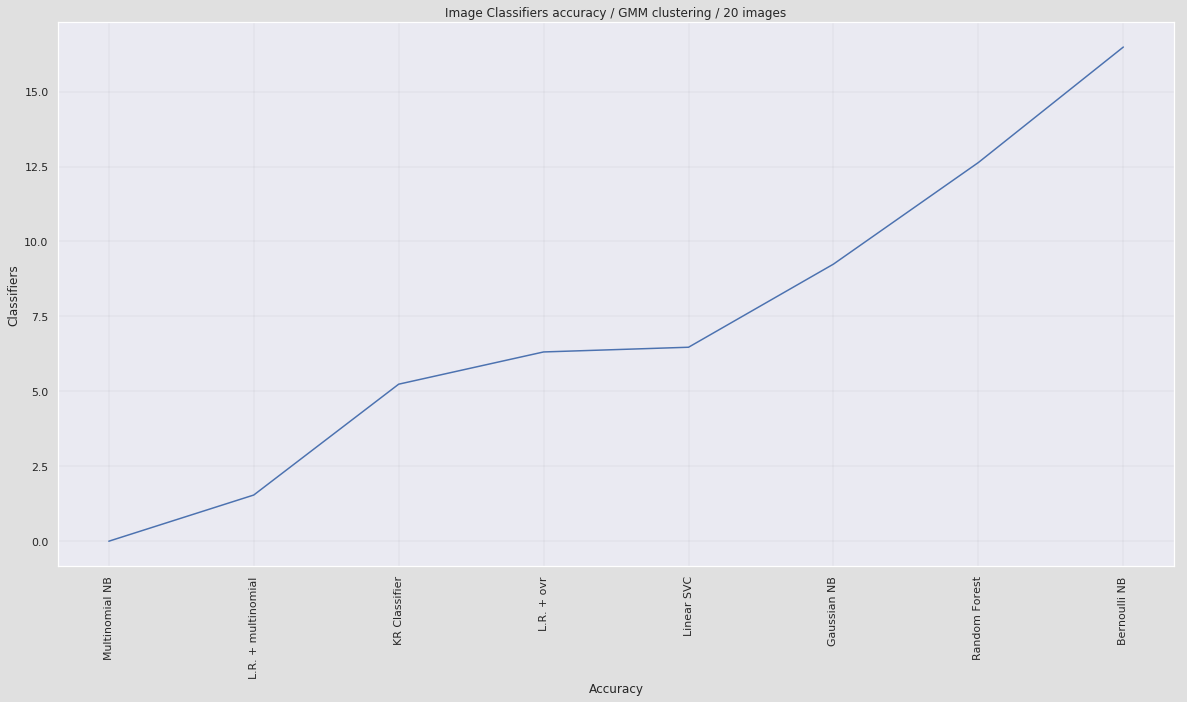

In [99]:
import pandas as pd
import p5_util
import p6_util_plot

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    dict_cls_score = p5_util.object_load(filename)
else :
    pass

dict_benchmark_result = dict_cls_score.copy()

df_result = pd.DataFrame.from_dict( dict_benchmark_result, orient='index')
df_result.reset_index(inplace=True)
df_result.rename(columns={'index':'Classifier',0:'Score'}, inplace=True)
df_result
nb_images = oP7_DataBreed._sampling_breed_count*oP7_DataBreed._sampling_image_per_breed_count

title = "Image Classifiers accuracy / GMM clustering / "+str(nb_images)+" images"
p6_util_plot.ser_item_occurency_plot(df_result.Classifier, df_result.Score*100, item_count=None, title=title,\
                                    p_reverse=False)

#### Classifier API



## <font color='blus'>4. Estimator model evaluation</font>

In [1081]:
import P7_DataBreed

oP7_DataBreed_new = P7_DataBreed.P7_DataBreed('./data/EasyImages')
filename = './data/best_dict_classifier.dump'
oP7_DataBreed_new.dict_classifier_load(filename)

oP7_DataBreed_new.dict_cluster_model = oP7_DataBreed.dict_cluster_model
oP7_DataBreed_new._cluster_model_name='GMM'
oP7_DataBreed_new.classifier_name = 'Bernoulli NB'
oP7_DataBreed_new._ser_breed_number = oP7_DataBreed._ser_breed_number.copy()
oP7_DataBreed_new.show()

p5_util.object_load : fileName= ./data/best_dict_classifier.dump

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 0
Total number of images ........ : 0
Standard images size .......... : (200, 200)
SIFT Descriptors count ........ : 0
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (0, 0)
Labels from dataset ........... : ()
Number of breeds .............. : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : Bernoulli NB
Supported classifiers ......... : ['Bernoulli NB']



#### <font color='blus'> Show breeds names and images from breed that are not into images sample</font>

In [1146]:
oP7_DataBreed.show_breedname()

Doberman ..... : n02107142-Doberman
African_hunting_dog ..... : n02116738-African_hunting_dog
malinois ..... : n02105162-malinois
standard_poodle ..... : n02113799-standard_poodle
dingo ..... : n02115641-dingo
Saint_Bernard ..... : n02109525-Saint_Bernard
boxer ..... : n02108089-boxer


In [1157]:
oP7_DataBreed.show_image_name('standard_poodle', is_sample_show=False)


Number of images =66
Image name= n02113799_153.jpg
Image name= n02113799_4458.jpg
Image name= n02113799_1328.jpg
Image name= n02113799_2325.jpg
Image name= n02113799_204.jpg
Image name= n02113799_300.jpg
Image name= n02113799_6740.jpg
Image name= n02113799_4454.jpg
Image name= n02113799_5157.jpg
Image name= n02113799_3945.jpg
Image name= n02113799_1444.jpg
Image name= n02113799_815.jpg
Image name= n02113799_2068.jpg
Image name= n02113799_5009.jpg
Image name= n02113799_1727.jpg
Image name= n02113799_961.jpg
Image name= n02113799_4557.jpg
Image name= n02113799_4740.jpg
Image name= n02113799_1144.jpg
Image name= n02113799_3278.jpg
Image name= n02113799_1057.jpg
Image name= n02113799_6304.jpg
Image name= n02113799_6382.jpg
Image name= n02113799_336.jpg
Image name= n02113799_4248.jpg
Image name= n02113799_1696.jpg
Image name= n02113799_1518.jpg
Image name= n02113799_589.jpg
Image name= n02113799_341.jpg
Image name= n02113799_6116.jpg
Image name= n02113799_311.jpg
Image name= n02113799_4491

kpdesc_build() : desc.shape=(3, 128)

*** WARN : Nb of exceptions during process ... : 41

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_clust

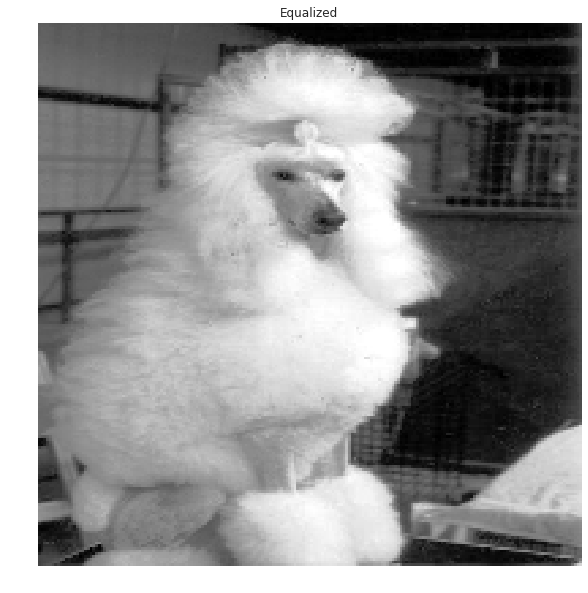

In [1184]:
import p7_util
import P7_DataBreed

dirbreed  = 'n02113799-standard_poodle'
imagename = 'n02113799_895.jpg'

print(oP7_DataBreed_new.predict(dirbreed,imagename))

dict_pil_image = P7_DataBreed.process_breed_sample(oP7_DataBreed.dir_path+'/'+dirbreed, [imagename] , oP7_DataBreed.std_size)

dict_pil_image_display = dict()
dict_pil_image_display['Equalized'] = dict_pil_image['equalize'][0]
p7_util.p7_image_pil_show(dict_pil_image_display,std_image_size=None)

In [1130]:
dirbreed  = 'n02107142-Doberman'

imagename = 'n02107142_385.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename)


*** WARN : Nb of exceptions during process ... : 2

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

***Nb of errors= 2
46 46

***WARN : build_datakp_bof() : errors= 2


('Doberman', ['Doberman', 'boxer', 'standard_poodle'])

In [1080]:
oP7_DataBreed_new._ser_breed_number

0    malinois
dtype: object

In [1128]:
dirbreed = 'n02105162-malinois'
imagename ='n02105162_3346.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename)


*** WARN : Nb of exceptions during process ... : 5

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

***Nb of errors= 5
75 75

***WARN : build_datakp_bof() : errors= 5


('malinois', ['boxer', 'malinois', 'dingo'])

In [1127]:
imagename = 'n02109525_13154.jpg'
dirbreed = 'n02109525-Saint_Bernard'
oP7_DataBreed_new.predict(dirbreed,imagename,top=7)


***Nb of errors= 0
110 110


('Saint_Bernard',
 ['boxer',
  'malinois',
  'dingo',
  'standard_poodle',
  'Doberman',
  'African_hunting_dog',
  'Saint_Bernard'])

In [1125]:
dirbreed = 'n02116738-African_hunting_dog'
imagename = 'n02116738_634.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename,top=7)


***Nb of errors= 0
70 70


('African_hunting_dog',
 ['Doberman',
  'boxer',
  'dingo',
  'standard_poodle',
  'malinois',
  'African_hunting_dog',
  'Saint_Bernard'])

In [1085]:
oP7_DataBreed_new._ser_breed_number

0               Doberman
1    African_hunting_dog
2               malinois
3        standard_poodle
4                  dingo
5          Saint_Bernard
6                  boxer
dtype: object

In [1095]:
dirbreed = 'n02108089-boxer'

dict_list_image = p7_util.p7_load_data(oP7_DataBreed.dir_path, dirbreed)


In [1096]:
oP7_DataBreed._dict_breed_sample[dirbreed]

['n02108089_7431.jpg',
 'n02108089_15702.jpg',
 'n02108089_2953.jpg',
 'n02108089_2917.jpg',
 'n02108089_9076.jpg']

In [1099]:
dict_list_image[dirbreed]

['n02108089_69.jpg',
 'n02108089_6418.jpg',
 'n02108089_1357.jpg',
 'n02108089_13898.jpg',
 'n02108089_4158.jpg',
 'n02108089_5977.jpg',
 'n02108089_3365.jpg',
 'n02108089_6295.jpg',
 'n02108089_11122.jpg',
 'n02108089_7259.jpg',
 'n02108089_11875.jpg',
 'n02108089_1511.jpg',
 'n02108089_995.jpg',
 'n02108089_13738.jpg',
 'n02108089_15432.jpg',
 'n02108089_2740.jpg',
 'n02108089_1757.jpg',
 'n02108089_10901.jpg',
 'n02108089_849.jpg',
 'n02108089_4002.jpg',
 'n02108089_1654.jpg',
 'n02108089_1575.jpg',
 'n02108089_3557.jpg',
 'n02108089_13526.jpg',
 'n02108089_485.jpg',
 'n02108089_1775.jpg',
 'n02108089_11616.jpg',
 'n02108089_2106.jpg',
 'n02108089_1104.jpg',
 'n02108089_11807.jpg',
 'n02108089_1159.jpg',
 'n02108089_5753.jpg',
 'n02108089_1956.jpg',
 'n02108089_7431.jpg',
 'n02108089_3669.jpg',
 'n02108089_10939.jpg',
 'n02108089_6583.jpg',
 'n02108089_770.jpg',
 'n02108089_10229.jpg',
 'n02108089_3547.jpg',
 'n02108089_922.jpg',
 'n02108089_11074.jpg',
 'n02108089_12738.jpg',
 'n02

In [1122]:
imagename = 'n02108089_12739.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename)


*** WARN : Nb of exceptions during process ... : 10

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

*** get_cluster_from_imagedesc() : Error on desc array

***Nb of errors= 10
60 60

***WARN : build_datakp_bof() : errors= 10


('boxer', ['boxer', 'malinois', 'dingo'])

In [1103]:
oP7_DataBreed_new.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 1
Total number of images ........ : 9
Standard images size .......... : (200, 200)
SIFT Descriptors count ........ : 60
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (60, 19)
Labels from dataset ........... : (1, 7)
Number of breeds .............. : 0
Image splitted ................ : True
Key point descriptors ......... : (597, 128)
Classifier name ............... : Bernoulli NB
Supported classifiers ......... : ['Bernoulli NB']



In [1142]:
print(oP7_DataBreed._dict_breedname_id)

{'Doberman': 'n02107142', 'African_hunting_dog': 'n02116738', 'malinois': 'n02105162', 'standard_poodle': 'n02113799', 'dingo': 'n02115641', 'Saint_Bernard': 'n02109525', 'boxer': 'n02108089'}


In [1149]:
oP7_DataBreed._dict_breed_sample

{'n02107142-Doberman': ['n02107142_10009.jpg',
  'n02107142_16400.jpg',
  'n02107142_278.jpg',
  'n02107142_14813.jpg',
  'n02107142_8331.jpg'],
 'n02116738-African_hunting_dog': ['n02116738_7988.jpg',
  'n02116738_684.jpg',
  'n02116738_634.jpg',
  'n02116738_8653.jpg',
  'n02116738_6076.jpg'],
 'n02105162-malinois': ['n02105162_3925.jpg',
  'n02105162_3595.jpg',
  'n02105162_1572.jpg',
  'n02105162_7112.jpg',
  'n02105162_5829.jpg'],
 'n02113799-standard_poodle': ['n02113799_1646.jpg',
  'n02113799_5227.jpg',
  'n02113799_253.jpg',
  'n02113799_4143.jpg',
  'n02113799_1793.jpg'],
 'n02115641-dingo': ['n02115641_3214.jpg',
  'n02115641_10261.jpg',
  'n02115641_7549.jpg',
  'n02115641_10261.jpg',
  'n02115641_7109.jpg'],
 'n02109525-Saint_Bernard': ['n02109525_8312.jpg',
  'n02109525_7109.jpg',
  'n02109525_1717.jpg',
  'n02109525_1271.jpg',
  'n02109525_4516.jpg'],
 'n02108089-boxer': ['n02108089_7431.jpg',
  'n02108089_15702.jpg',
  'n02108089_2953.jpg',
  'n02108089_2917.jpg',
  'n0